In [6]:
from sklearn.datasets import  load_diabetes, load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as SklearnRandomForestRegressor
from RandomForestRegressor import RandomForestRegressor

from matplotlib import pyplot as plt

In [3]:

diabetes_data = load_diabetes()
iris_data = load_iris()
wine_data = load_wine()
datasets = [
    ("Iris", iris_data.data, iris_data.target),
    ("Wine", wine_data.data, wine_data.target),
    ("Diabetes", diabetes_data.data, diabetes_data.target)
]

# Initialize models
models = {
    'Custom Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Scikit-Learn Random Forest Regressor': SklearnRandomForestRegressor(n_estimators=100, random_state=42)
}


In [4]:
results = {}
for name, model in models.items():
    results[name] = []
    for dataset_name, X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[name].append(mse)



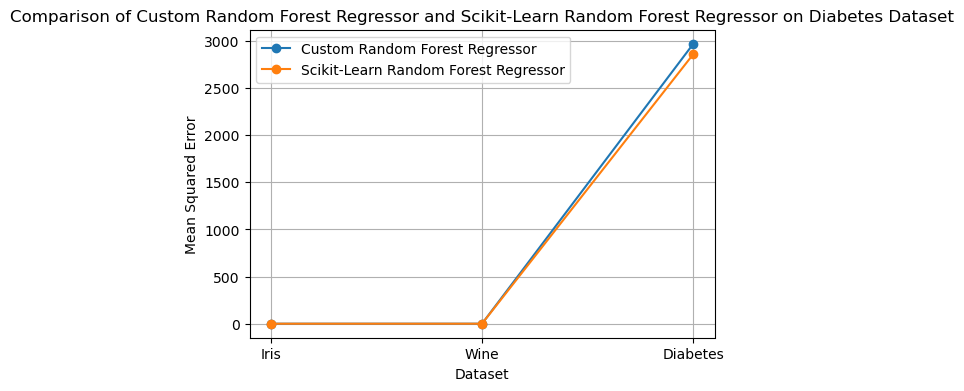

In [7]:
# Plotting the results
plt.figure(figsize=(6, 4))
for name, mses in results.items():
    plt.plot(range(1, len(datasets)+1), mses, label=name, marker='o')

plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Custom Random Forest Regressor and Scikit-Learn Random Forest Regressor on Diabetes Dataset')
plt.xticks(range(1, len(datasets)+1), [name for name, _, _ in datasets])
plt.legend()
plt.grid(True)
plt.show()